<a href="https://colab.research.google.com/github/BuczynskiRafal/ML/blob/main/unsupervised/08_pca_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import bibliotek


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=150)

# Załadowanie danych - breast cancer


In [2]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']
data[:3]


array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,
           8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,    0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,
           0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189],
       [  20.57  ,   17.77  ,  132.9   , 1326.    ,    0.0847,    0.0786,    0.0869,    0.0702,    0.1812,    0.0567,    0.5435,    0.7339,
           3.398 ,   74.08  ,    0.0052,    0.0131,    0.0186,    0.0134,    0.0139,    0.0035,   24.99  ,   23.41  ,  158.8   , 1956.    ,
           0.1238,    0.1866,    0.2416,    0.186 ,    0.275 ,    0.089 ],
       [  19.69  ,   21.25  ,  130.    , 1203.    ,    0.1096,    0.1599,    0.1974,    0.1279,    0.2069,    0.06  ,    0.7456,    0.7869,
           4.585 ,   94.03  ,    0.0062,    0.0401,    0.0383,    0.0206,    0.0225,    0.0046,   23.57  ,   25.53  ,  152.5   , 1709.    ,
          

In [3]:
target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
data.shape

(569, 30)

# Standaryzacja


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:3]

array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,
         1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867, -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ],
       [ 1.8298, -0.3536,  1.686 ,  1.9087, -0.827 , -0.4871, -0.0238,  0.5481,  0.0014, -0.8687,  0.4993, -0.8762,  0.2633,  0.7424, -0.6054,
        -0.6929, -0.4408,  0.2602, -0.8055, -0.0994,  1.8059, -0.3692,  1.5351,  1.8905, -0.3756, -0.4304, -0.1467,  1.0871, -0.2439,  0.2812],
       [ 1.5799,  0.4562,  1.5665,  1.5589,  0.9422,  1.0529,  1.3635,  2.0372,  0.9397, -0.398 ,  1.2287, -0.7801,  0.8509,  1.1813, -0.297 ,
         0.815 ,  0.2131,  1.4248,  0.237 ,  0.2936,  1.5119, -0.024 ,  1.3475,  1.4563,  0.5274,  1.0829,  0.855 ,  1.955 ,  1.1523,  0.2014]])

# PCA - 2 komponenty


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [7]:
pca_2 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'class': target})
pca_2.replace(0, 'Benign', inplace=True)
pca_2.replace(1, 'Malignant', inplace=True)
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [8]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [9]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950, template='plotly_dark'))
fig.show()


In [10]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')


# PCA - 3 komponenty


In [11]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898]])

In [12]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'pca_3': data_pca[:, 2], 'class': target})
pca_3.replace(0, 'Benign', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948583,-1.123176,Benign
1,2.387802,-3.768172,-0.529298,Benign
2,5.733896,-1.075174,-0.551746,Benign
3,7.122953,10.275589,-3.232796,Benign
4,3.935302,-1.948072,1.389759,Benign


In [13]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [14]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [15]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class', 
              opacity=0.7, size_max=10, width=950, template='plotly_dark')

# Zbiór danych MNIST


In [16]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [17]:
# Obcięcie danych do pierwszych 5000 zdjęć
X_train = X_train[:5000]
y_train = y_train[:5000]


In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

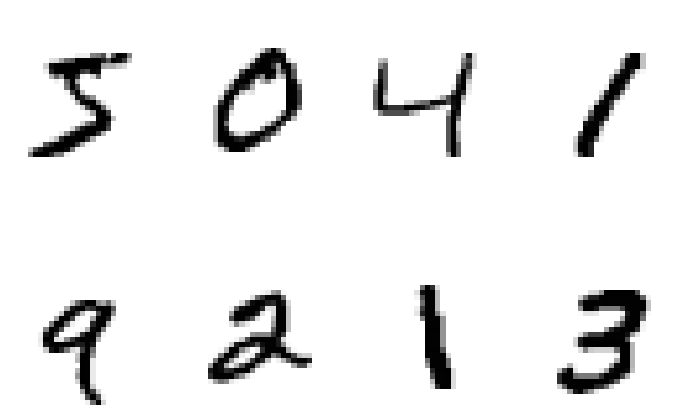

In [20]:
# Wizualizacja danych
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

In [22]:
# Standaryzacja
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(5000, 28, 28)

In [23]:
# Spłaszczenie danych 
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(5000, 784)

In [24]:
# PCA - 3 komponenty

pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.0018,  0.0057, -0.0005],
       [ 0.016 ,  0.0059,  0.0085],
       [-0.0004, -0.007 , -0.0024],
       [-0.0135,  0.0092,  0.0024],
       [-0.0055, -0.0106, -0.0007]])

In [25]:
# Wyjaśniona wariancja

results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [26]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

In [27]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.001786,0.005672,-0.000496,5.0
1,0.015952,0.005944,0.008482,0.0
2,-0.000438,-0.006972,-0.002424,4.0
3,-0.013488,0.009168,0.002395,1.0
4,-0.005502,-0.010569,-0.000676,9.0


In [28]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', 
              symbol='class', opacity=0.7, size_max=10, width=950, height=700, 
              template='plotly_dark', title='PCA - MNIST dataset')

In [31]:
# obliczenia pca jako % wyjaśnionej wariancji w tym przypadku ma wyjaśniać 95% wariancji naszych danych 
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.0018,  0.0057, -0.0005, -0.008 , -0.0036,  0.0034,  0.0028,  0.0015,  0.0048, -0.0022,  0.0009, -0.0071, -0.0042,  0.0113,  0.0002,
         0.0016, -0.0053, -0.0019,  0.0029,  0.0049,  0.0019,  0.0035,  0.0028,  0.0031, -0.001 , -0.0014,  0.0051,  0.0017,  0.0018, -0.0006,
        -0.0023,  0.0001, -0.0003, -0.0006, -0.0007, -0.0017,  0.0028, -0.0014,  0.0017,  0.0067,  0.001 , -0.0033, -0.0015, -0.0006, -0.0002,
        -0.002 , -0.0024, -0.0008,  0.0008, -0.0016,  0.0012, -0.0004,  0.0005, -0.0023,  0.0001,  0.0028,  0.0019,  0.0024, -0.0011, -0.0006,
         0.0022, -0.0005,  0.0026, -0.0013,  0.0031,  0.001 , -0.0002, -0.001 , -0.0013, -0.0004, -0.0001, -0.0025,  0.    , -0.001 , -0.0014,
        -0.0011,  0.0001,  0.0009,  0.0005, -0.0001, -0.0003, -0.0008, -0.0004,  0.0003, -0.0019, -0.0014, -0.0009,  0.0007, -0.0009, -0.0004,
         0.0009, -0.0003,  0.0002,  0.001 , -0.0001, -0.0006,  0.0001,  0.0009,  0.0014,  0.0001, -0.0021, -0.0002, -0.0009,  0.0007, -0.0001,

In [33]:
# ile komponentów było potrzebne do obliczenia PCA
pca.n_components_

148

In [34]:
# Wyjaśniona wariancja

results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [35]:
# 148 rows × 3 columns

fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()